![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
#!pip install -r requirements.txt

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

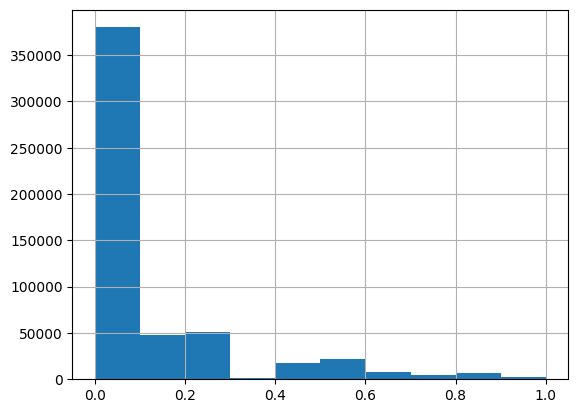

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

,target
count,541462.000000
mean,0.102991
std,0.196979
min,0.000000
25%,0.000000
50%,0.000000
75%,0.166667
max,1.000000


In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Vectorización con Countvectorizer
vectorizer1=CountVectorizer()
X_train_vec1=vectorizer1.fit_transform(X_train)
X_test_vec1=vectorizer1.transform(X_test)

In [22]:
#En un principio para el taller probamos Random Forest. Sin embargo, notamos que era muy pesado, especialmente usando
#CountVectorizer, trigramas y TfidfVectorizer, por ello decidimos usar Ridge Regression, dandonos un resultado eficiente
#sin necesidad de usar muchos recursos computacionales.
#Se considero que Ridge es una buena opción porque funciona muy bien cuando se tienen muchas variables, como ocurre con
#los datos de texto.Ademas, al ser un modelo lineal con regularización, ayuda a evitar el sobreajuste y es más fácil de
#interpretar que un modelo como Random Forest.

from sklearn.linear_model import Ridge
model1 = Ridge(alpha=1.0)
model1.fit(X_train_vec1, y_train)

Ridge()

In [11]:
#realizamos la predicción y evaluamos
from sklearn.metrics import mean_squared_error
y_pred1=model1.predict(X_test_vec1)
mse1=mean_squared_error(y_test, y_pred1)
print("Punto 1 - MSE con CountVectorizer y Ridge:", mse1)



Punto 1 - MSE con CountVectorizer y Ridge: 0.026127568447282163


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 2
vectorizer2=CountVectorizer(ngram_range=(3,3)) #definimos solo trigramas
X_train_vec2=vectorizer2.fit_transform(X_train)
X_test_vec2=vectorizer2.transform(X_test)

In [19]:
#nuevamente aplicamos el modelo de regresión ridge
model2 = Ridge(alpha=1.0)
model2.fit(X_train_vec2, y_train)

Ridge()

In [20]:
#hacemos la predicción para la tokenización con CountVectorizer y trigramas
y_pred2 = model2.predict(X_test_vec2)
mse2 = mean_squared_error(y_test, y_pred2)
print("Punto 2 - MSE con trigramas:", mse2)

Punto 2 - MSE con trigramas: 0.036780024535606866


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [12]:
#La función convierte el texto en evaluación en una matriz, que pondera la frecuencia de una palabra en un documento, dependiendo
#que tan rara o común sea dentro de un Corpust. En términos prácticos, resulta de mucha ayuda para la identificación de terminos relevantes
#dentro de un documento, evitando que haya un exceso de ruido causado por palabras poco importantes como conectores sin importancia.

#Ventajas
#-Da un peso relativo bajo a palabras que tienden a repetirse mucho dentro de un texto.
#-la función ayuda a mejorar en teoría mucho el desempeño en la predicción cuando hay muchas palabras que no son relevantes.

#Desventajas
#-No es muy util cuando se utiliza en textos cortos, ya que no es posible bajar el epso de palabras irrelevantes tan facilmente.
# -En términos computacionales es mucho más compleja que CountVectorizer.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
#llamamos libreria
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorización con Tfidf
vectorizer4 = TfidfVectorizer()
X_train_vec4 = vectorizer4.fit_transform(X_train)
X_test_vec4 = vectorizer4.transform(X_test)

In [14]:
#utilizamos el mismo modelo Ridge
model4 = Ridge(alpha=1.0)
model4.fit(X_train_vec4, y_train)

Ridge()

In [15]:
#ahora realizamos la predicción utiliando tfidfVectorizer
y_pred4 = model4.predict(X_test_vec4)
mse4 = mean_squared_error(y_test, y_pred4)
print("Punto 4 - MSE con TfidfVectorizer:", mse4)

Punto 4 - MSE con TfidfVectorizer: 0.01805127606588911


In [16]:
y_pred4

array([0.00033435, 0.03391324, 0.08328057, ..., 0.06845778, 0.00138699,
       0.16257242])

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

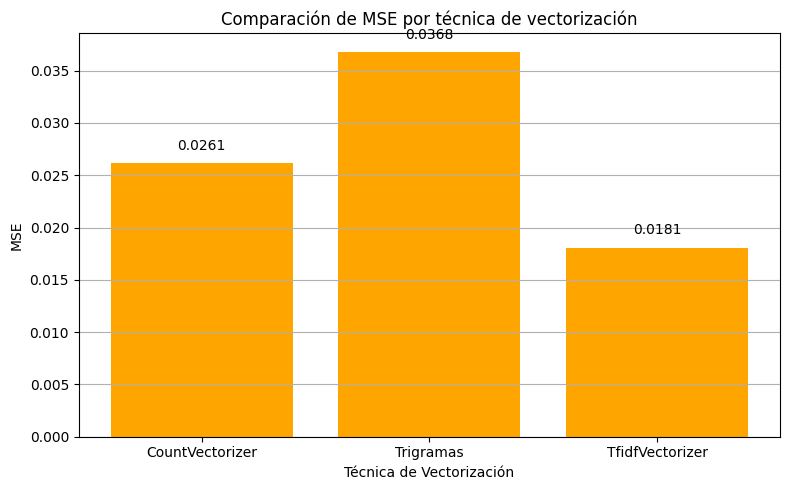

In [21]:
import matplotlib.pyplot as plt
mse_values = {
    "CountVectorizer": mse1,
    "Trigramas": mse2,
    "TfidfVectorizer": mse4
}

# Crear gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(mse_values.keys(), mse_values.values(), color='orange')
plt.title("Comparación de MSE por técnica de vectorización")
plt.ylabel("MSE")
plt.xlabel("Técnica de Vectorización")
plt.grid(axis='y')

# Añadir etiquetas de MSE encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f"{yval:.4f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
### Punto 5.1 - Comparación y análisis de resultados
#Los resultados de la comparación de MSE (Error Cuadrático Medio) nos muestran que el TfidfVectorizer presenta el mejor desempeño, con un valor de 0.0181.
#Esto sugiere que esta técnica es más efectiva para capturar la relevancia de las palabras.
#Por otro lado, el CountVectorizer tiene un MSE de 0.0261, que aunque es inferior al de los trigramas, indica una menor capacidad de representar adecuadamente
#la data en comparación con el TfidfVectorizer. Por último, los trigramas muestran el desempeño más bajo con un MSE de 0.0368,
#lo que podría indicar que capturan información redundante o irrelevante, debilitando su eficacia en el modelado.
